/home/gautom/miniconda3/envs/LAVIS/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


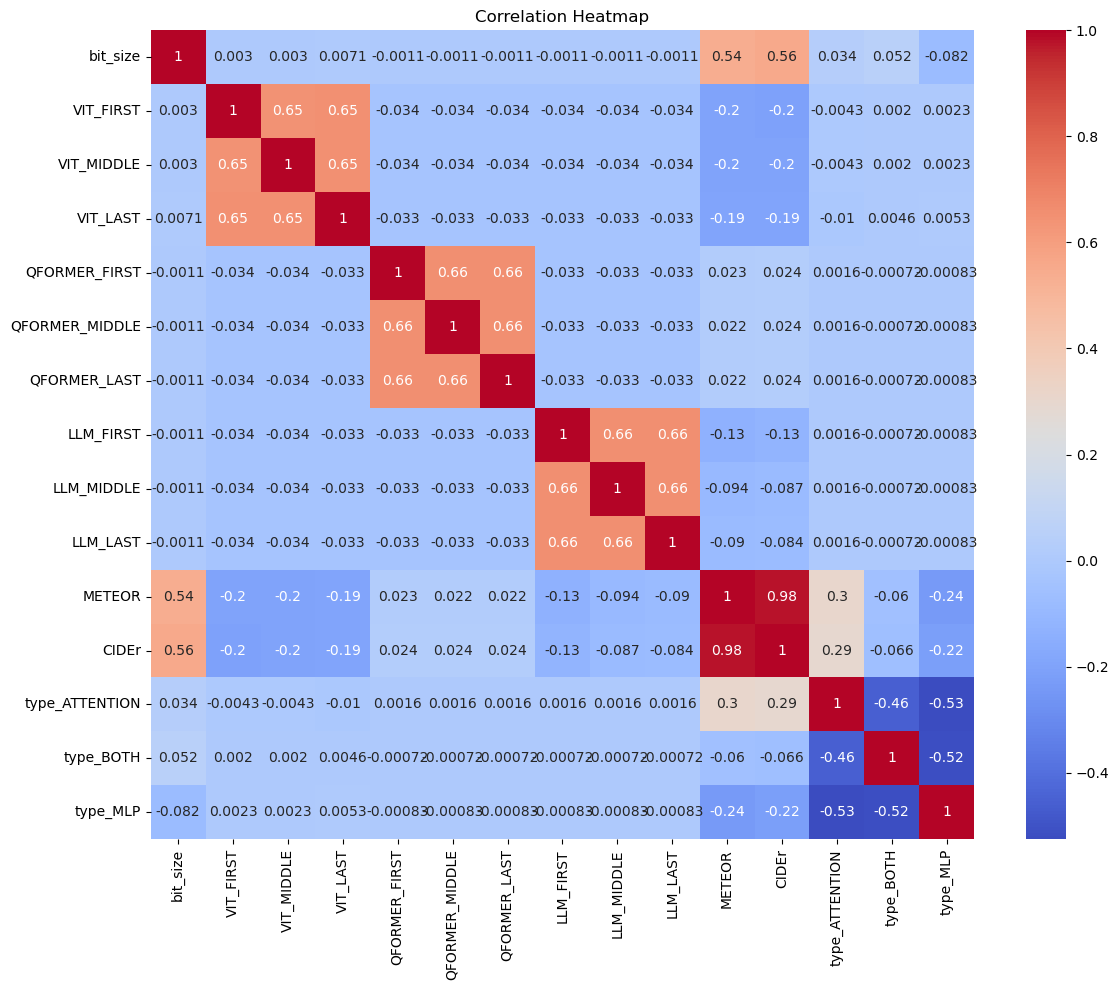

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the data
df = pd.read_csv('quantization_results.csv')

# Drop the 'config' column
df = df.drop('config', axis=1)

# One-hot encode the 'type' column
onehot = OneHotEncoder(sparse=False)
type_encoded = onehot.fit_transform(df[['type']])
type_columns = onehot.get_feature_names(['type'])
df_encoded = pd.concat([df.drop('type', axis=1), pd.DataFrame(type_encoded, columns=type_columns)], axis=1)

# Correlation analysis
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

/home/gautom/miniconda3/envs/LAVIS/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


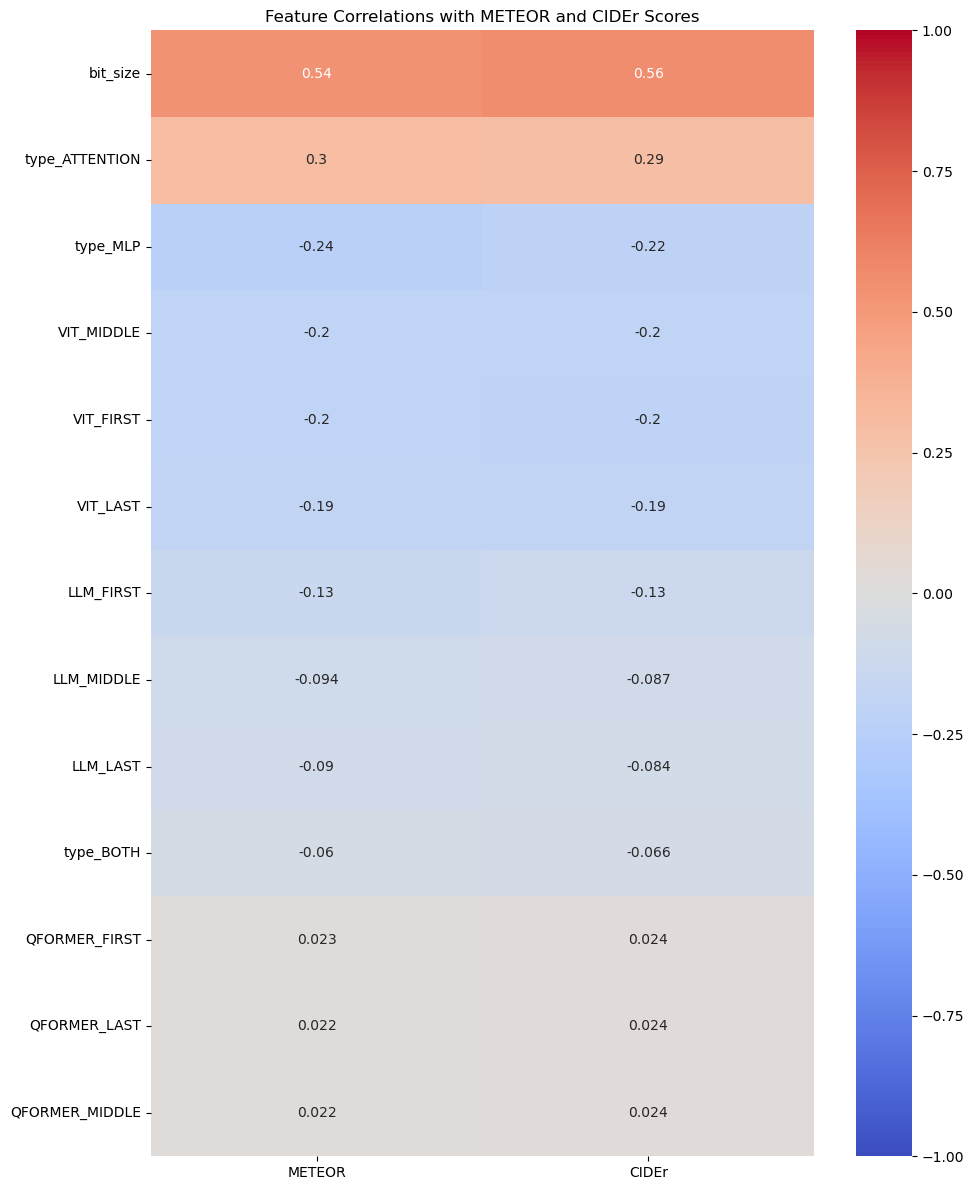

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the data
df = pd.read_csv('quantization_results.csv')

# Drop the 'config' column
df = df.drop('config', axis=1)

# One-hot encode the 'type' column
onehot = OneHotEncoder(sparse=False)
type_encoded = onehot.fit_transform(df[['type']])
type_columns = onehot.get_feature_names(['type'])
df_encoded = pd.concat([df.drop('type', axis=1), pd.DataFrame(type_encoded, columns=type_columns)], axis=1)

# Select features (all columns except METEOR and CIDEr)
features = df_encoded.drop(['METEOR', 'CIDEr'], axis=1).columns

# Calculate correlations
correlations = df_encoded[features].corrwith(df_encoded['METEOR']).to_frame(name='METEOR')
correlations['CIDEr'] = df_encoded[features].corrwith(df_encoded['CIDEr'])

# Sort by absolute correlation with METEOR
correlations = correlations.reindex(correlations['METEOR'].abs().sort_values(ascending=False).index)

# Create heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlations with METEOR and CIDEr Scores')
plt.tight_layout()
plt.show()

## Random Forest Regressor

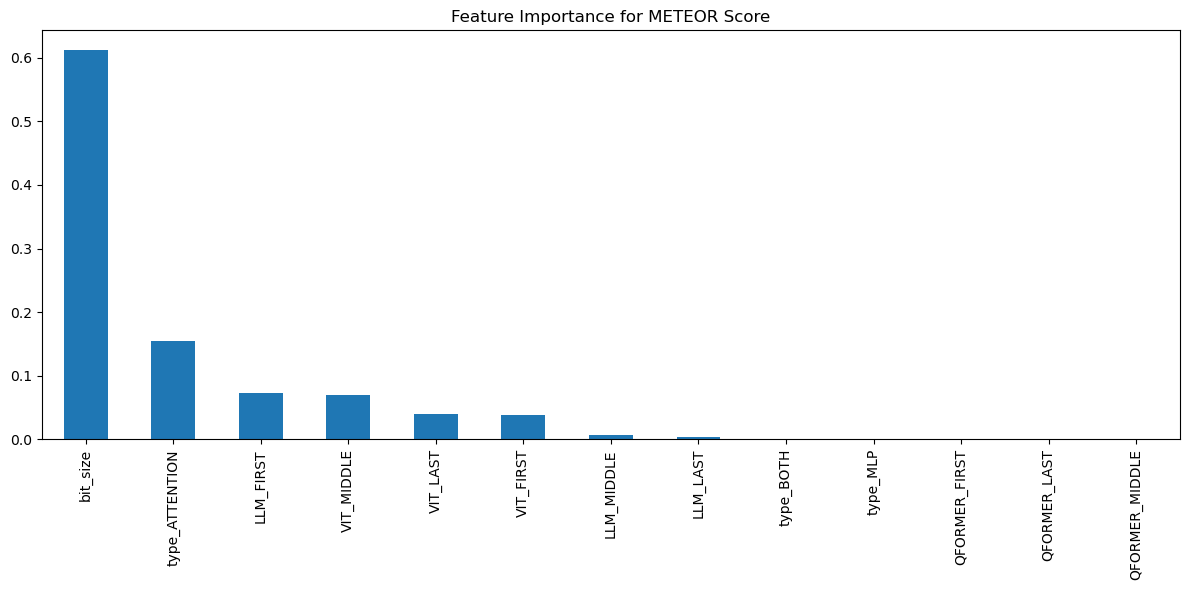

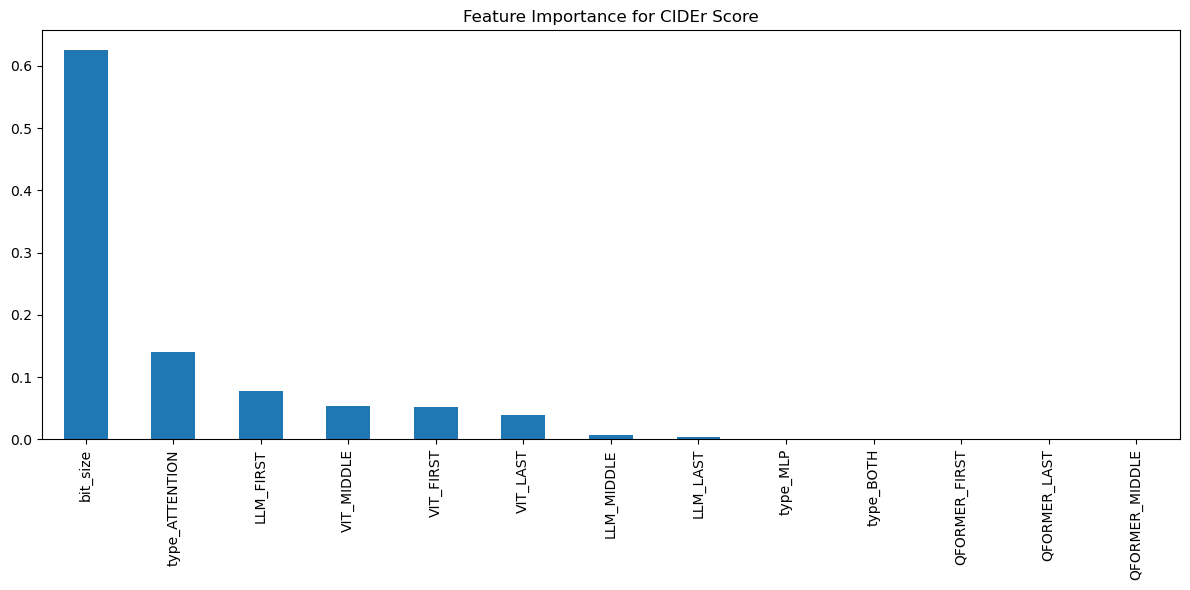

In [25]:

# Feature importance using Random Forest
X = df_encoded.drop(['METEOR', 'CIDEr'], axis=1)
y_meteor = df_encoded['METEOR']
y_cider = df_encoded['CIDEr']

rf_meteor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cider = RandomForestRegressor(n_estimators=100, random_state=42)

rf_meteor.fit(X, y_meteor)
rf_cider.fit(X, y_cider)

feature_importance_meteor = pd.Series(rf_meteor.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_cider = pd.Series(rf_cider.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importance_meteor.plot(kind='bar')
plt.title('Feature Importance for METEOR Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
feature_importance_cider.plot(kind='bar')
plt.title('Feature Importance for CIDEr Score')
plt.tight_layout()
plt.show()

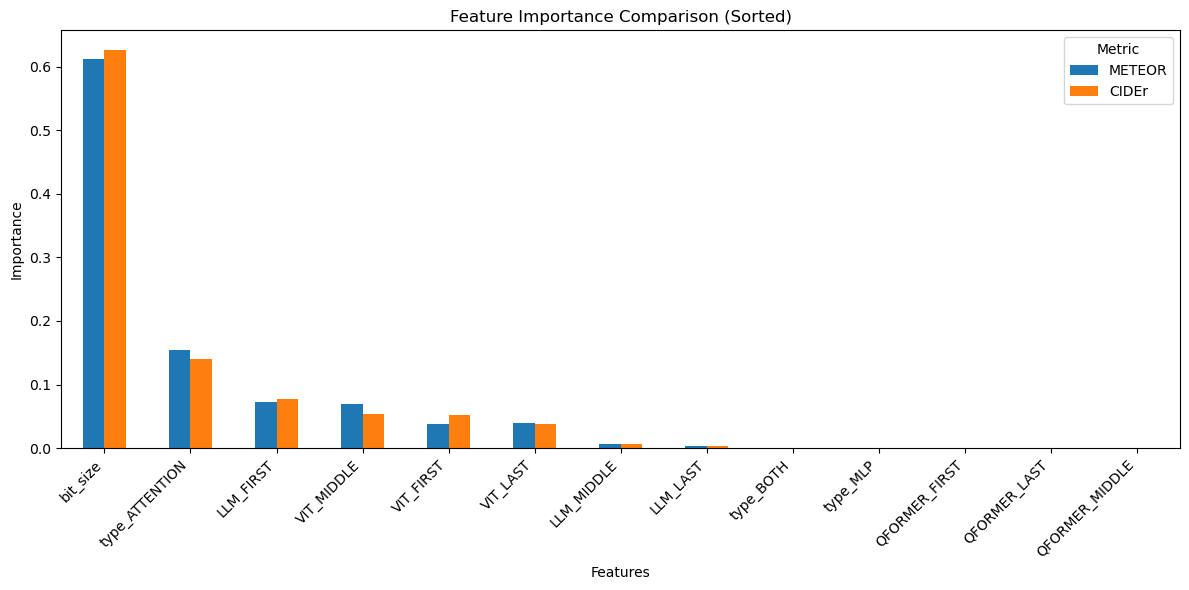

In [34]:
# Create the DataFrame
importance_df = pd.DataFrame({'METEOR': feature_importance_meteor, 'CIDEr': feature_importance_cider})

# Sort the DataFrame based on the sum of importances
importance_df['Total'] = importance_df['METEOR'] + importance_df['CIDEr']
importance_df_sorted = importance_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the sorted data
ax = importance_df_sorted.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance Comparison (Sorted)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Metric')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

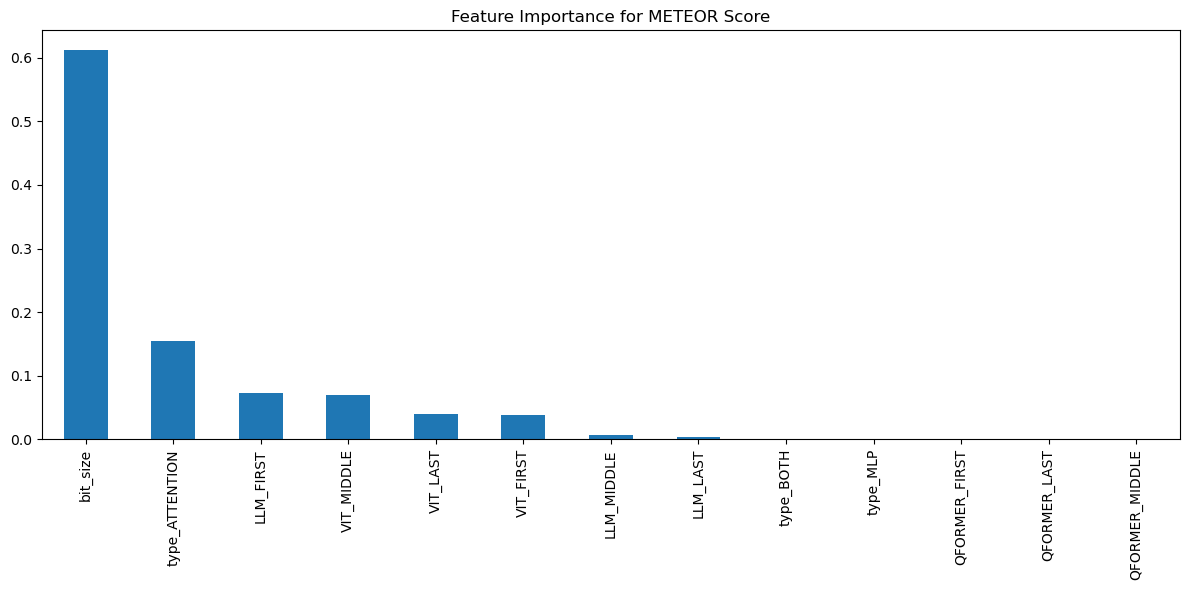

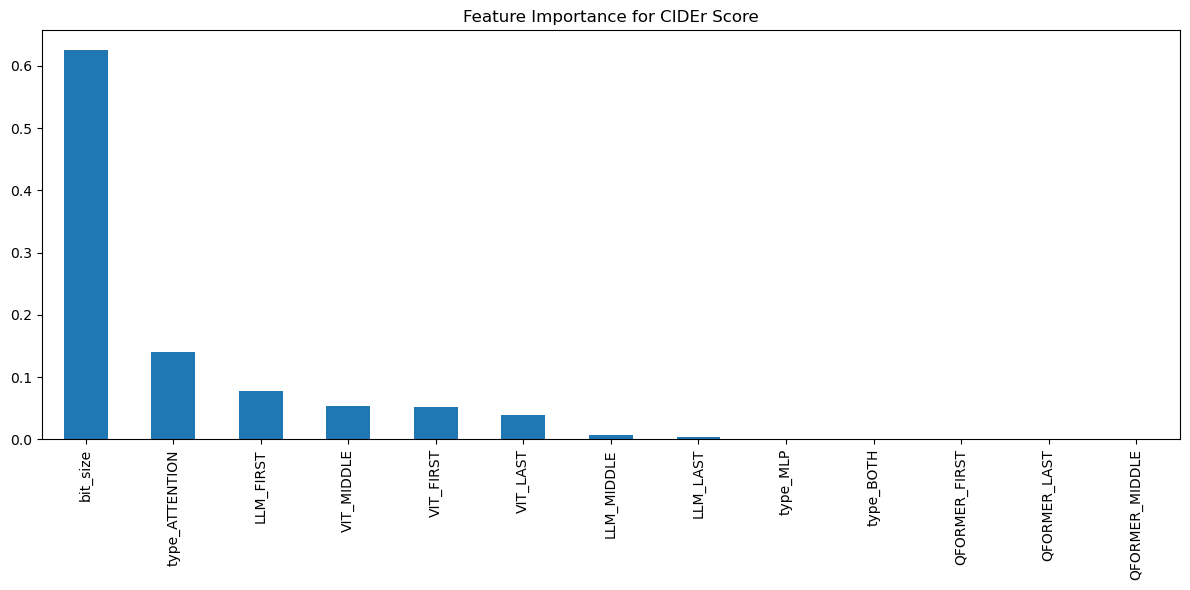

In [31]:
# Feature importance using Random Forest
df_encoded = df.drop('config', axis=1)
X = df_encoded.drop(['METEOR', 'CIDEr'], axis=1)
y_meteor = df_encoded['METEOR']
y_cider = df_encoded['CIDEr']

rf_meteor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_cider = RandomForestRegressor(n_estimators=100, random_state=42)

rf_meteor.fit(X, y_meteor)
rf_cider.fit(X, y_cider)

feature_importance_meteor = pd.Series(rf_meteor.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance_cider = pd.Series(rf_cider.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importance_meteor.plot(kind='bar')
plt.title('Feature Importance for METEOR Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
feature_importance_cider.plot(kind='bar')
plt.title('Feature Importance for CIDEr Score')
plt.tight_layout()
plt.show()

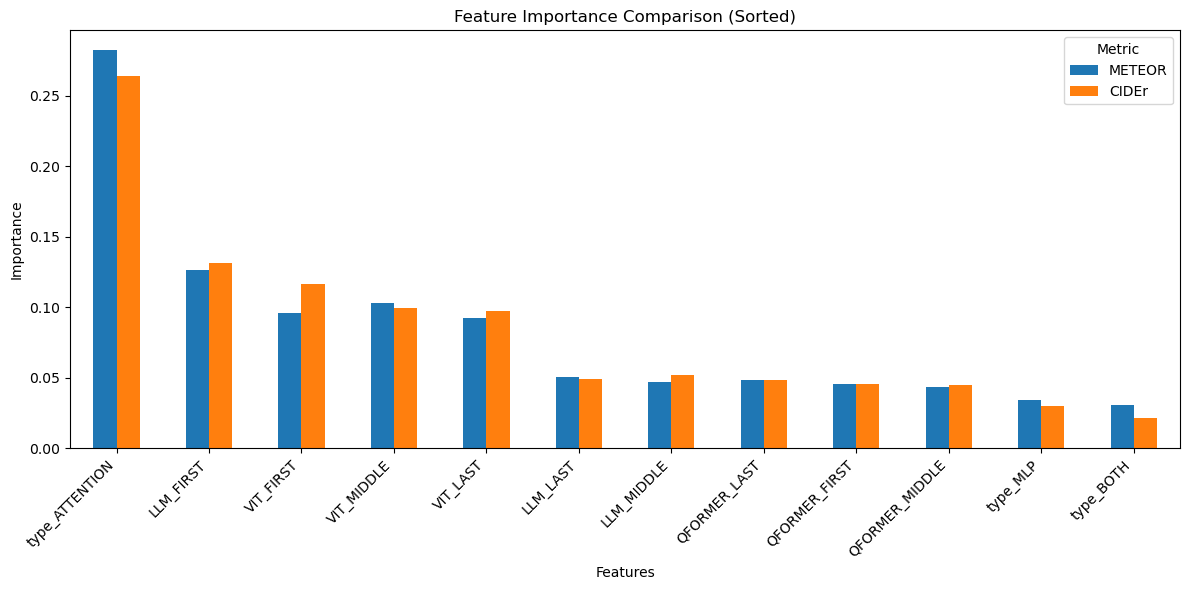

In [20]:
# Create the DataFrame
importance_df = pd.DataFrame({'METEOR': feature_importance_meteor, 'CIDEr': feature_importance_cider})

# Sort the DataFrame based on the sum of importances
importance_df['Total'] = importance_df['METEOR'] + importance_df['CIDEr']
importance_df_sorted = importance_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Plot the sorted data
ax = importance_df_sorted.plot(kind='bar', figsize=(12, 6))
plt. ktitle('Feature Importance Comparison (Sorted)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(title='Metric')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()